In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats, integrate

In [2]:
seed = sum(map(ord, "3.数据分布可视化"))
print('随机种子：',seed)
np.random.seed(seed)
sb.set(color_codes=True)

随机种子： 174611


#### 单特征数据快速绘图

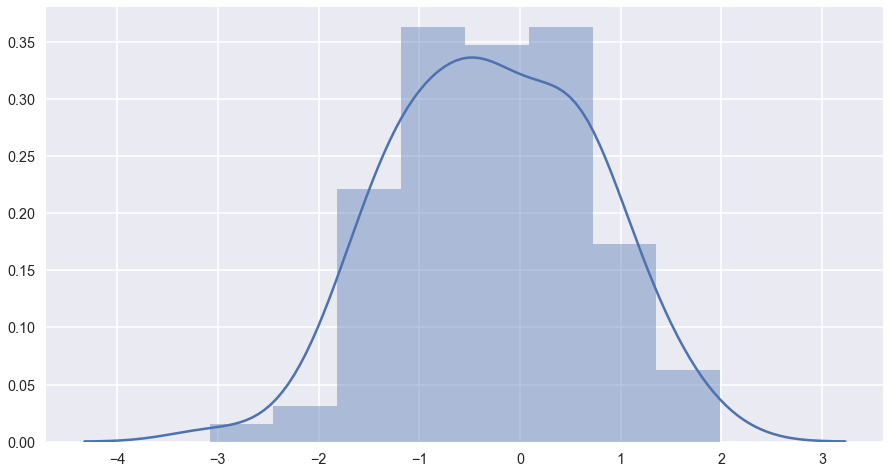

In [3]:
#seaborn提供了distplot方法，默认绘制的是直方图，并且带有KDE核密度估计函数
data = np.random.normal(size=100)
sb.set()
plt.figure(figsize=(15,8))
sb.set_context("poster", font_scale=0.9, rc={"lines.linewidth": 2.5})
sb.distplot(data)

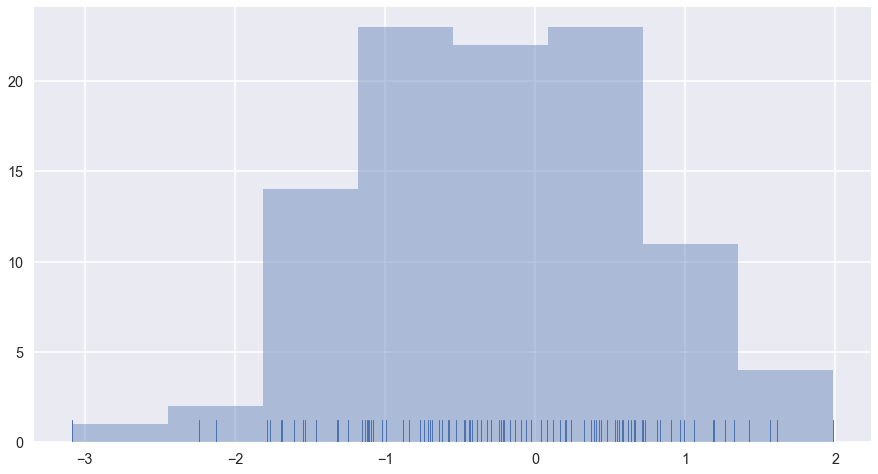

In [4]:
##直方图参数设置,弃用kde核密度函数，增添"小地毯"设置rug关键字参数为True
plt.figure(figsize=(15,8))
sb.distplot(data, kde=False, rug=True)

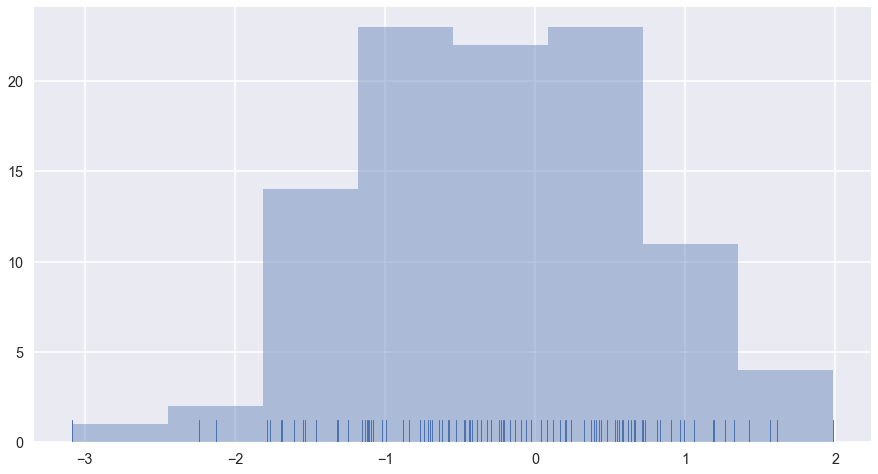

In [5]:
#直方图是对连续数据划分bins来绘图，bins的个数可以通过bins关键字参数指定
plt.figure(figsize=(15,8))
sb.distplot(data, kde=False, rug=True,bins=8)

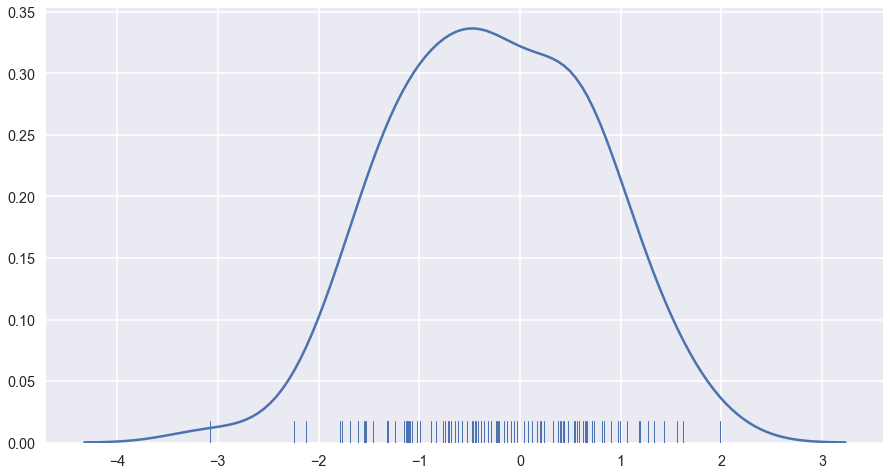

In [6]:
###只绘制核密度曲线，指定hist关键字参数为False即可
plt.figure(figsize=(15,8))
sb.distplot(data, kde=True, rug=True,hist=False)

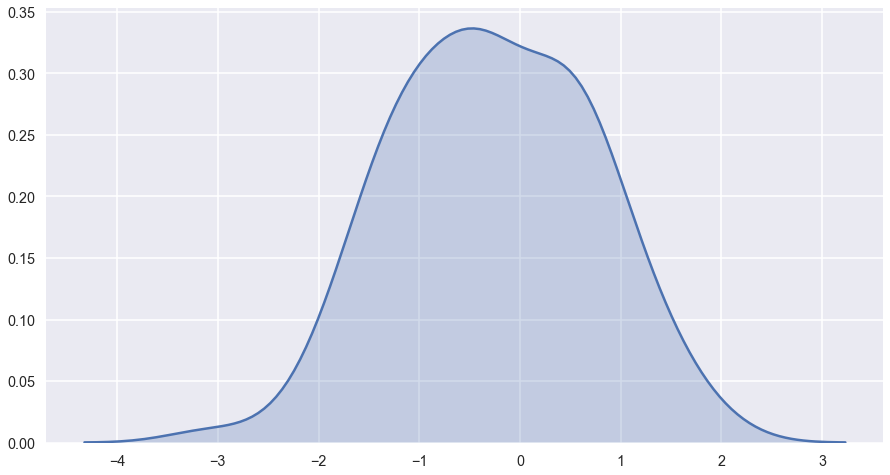

In [7]:
#使用kdeplot方法可以绘制出核密度分布曲线,通过shade指定阴影
plt.figure(figsize=(15,8))
sb.kdeplot(data, shade=True)

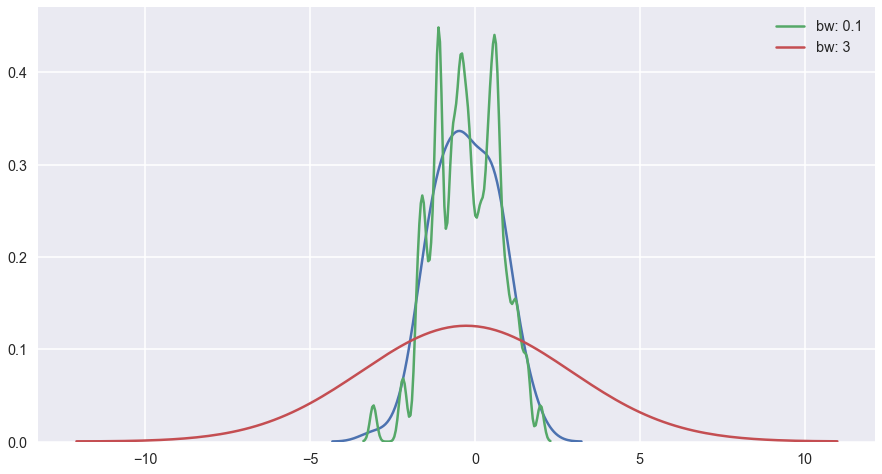

In [8]:
#通过bw bandwidth 参数指定kde拟合的精度.类似于直方图中的bins的效果
plt.figure(figsize=(15,8))
sb.kdeplot(data)
sb.kdeplot(data, bw=.1, label="bw: 0.1")
sb.kdeplot(data, bw=3, label="bw: 3")
plt.legend()

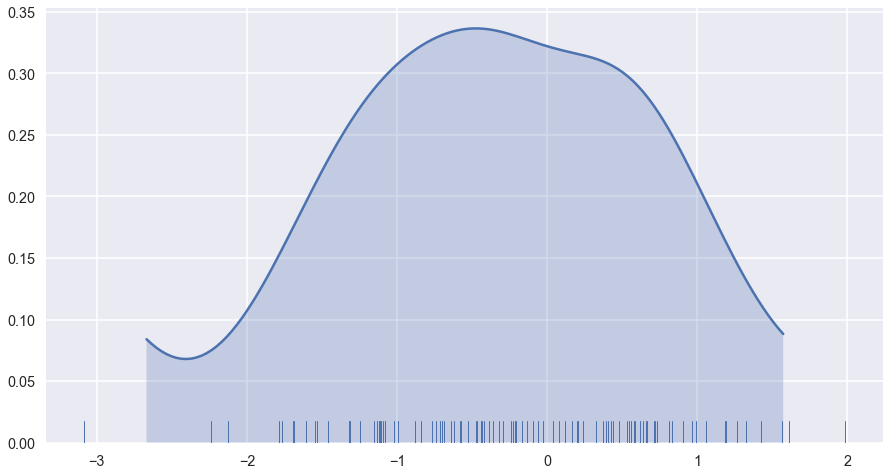

In [11]:
#使用cut关键字参数剪切出我们关心的区域，负值表示对图表进行剪切，该参数不会印象整体的分布，只会印象图表的显示
plt.figure(figsize=(15,8))
sb.kdeplot(data, shade=True, cut=-1)
sb.rugplot(data)

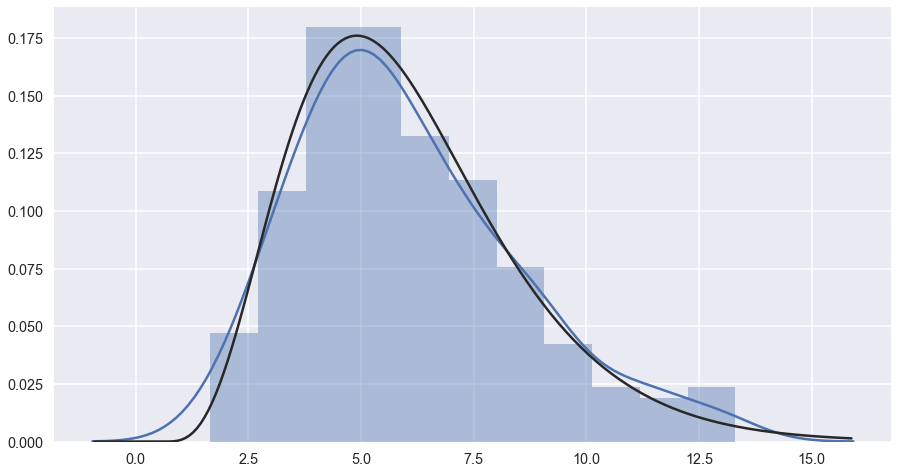

In [12]:
#使用参数估计直观看出整个数据集的分布情况，和kde核密度函数类似
plt.figure(figsize=(15,8))
x = np.random.gamma(6, size=200)
sb.distplot(x, kde=True, fit=stats.gamma)

### 二元分布图的绘制

In [13]:
#使用numpy中的multivariate_normal方法产生多元正太分布的数据，第一个参数为每个维度的均值，第二个参数为各个维度的协方差矩阵
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
#使用产生的data数组构建pandas中的DataFrame对象
df = pd.DataFrame(data, columns=["x", "y"])

In [14]:
df.head()

,x,y
0,-0.776479,0.816999
1,-1.126356,-0.407109
2,0.541012,1.315110
3,-1.665420,0.782705
4,-1.682092,-0.671753


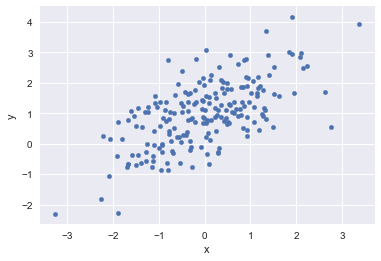

In [16]:
#matplot里最常见的绘制二元数据的图表是散点图
sb.set_context('notebook')
df.plot.scatter('x','y')

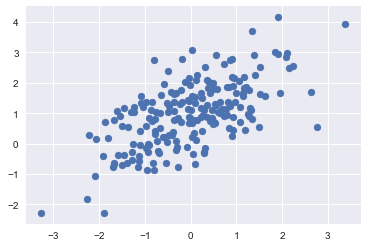

In [17]:
plt.scatter(df['x'],df['y'])

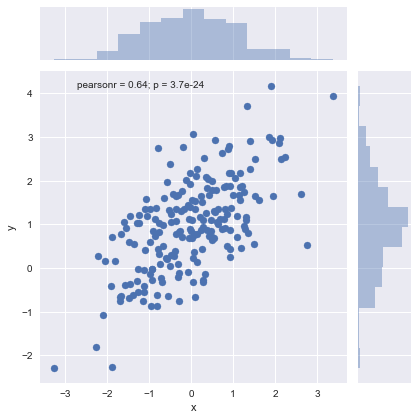

In [18]:
#使用seaborn中的jointplot绘制散点图
sb.jointplot(x="x", y="y", data=df)

### Hexbin plots蜂窝图

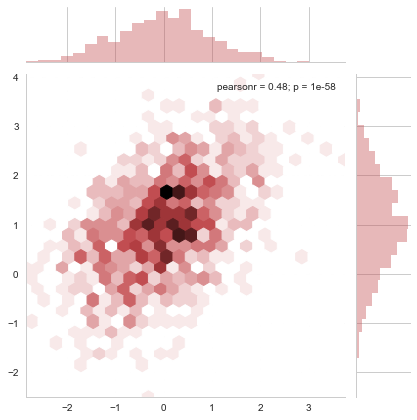

In [19]:
#jointplot中增加kind关键字参数，指定为hex，color用于指定颜色
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sb.axes_style("whitegrid"):
    sb.jointplot(x=x, y=y, kind="hex", color="r")

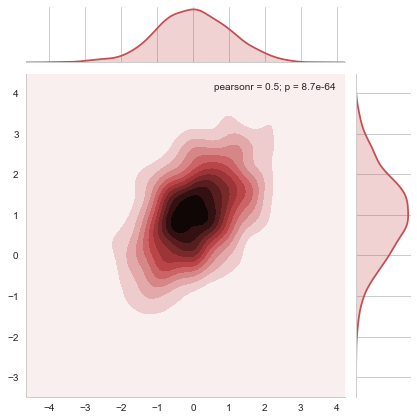

In [20]:
### jointplot中通过kind参数指定‘kde’参数，绘制核密度曲线
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sb.axes_style("whitegrid"):
    sb.jointplot(x=x, y=y, kind="kde", color="r")

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._subplots.AxesSubplot'>


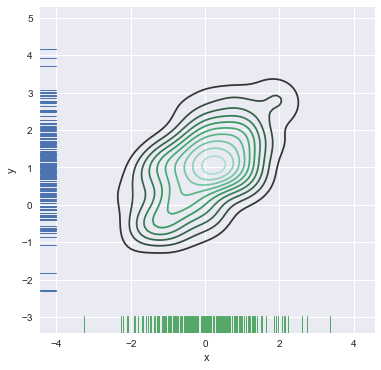

In [21]:
#seaborn提供了kdeplot方法用于绘制密度曲线,但是需要用到matplotlib中的axes对象，但是jointplot是自己管理这个对象的
f, ax = plt.subplots(figsize=(6, 6))
print(type(f),type(ax))
#kdeplot方法，接受x,y，和ax
sb.kdeplot(df.x, df.y, ax=ax)
#绘制注脚信息
sb.rugplot(df.x, color="g", ax=ax)
#指定vertical垂直方向
sb.rugplot(df.y, vertical=True, ax=ax)

[[ 0.          0.          0.          1.        ]
 [ 0.00371683  0.00345097  0.00700409  1.        ]
 [ 0.00749003  0.00687796  0.01398301  1.        ]
 ..., 
 [ 0.99587521  0.99117901  0.98726075  1.        ]
 [ 0.99792436  0.99560144  0.99360248  1.        ]
 [ 1.          1.          1.          1.        ]]


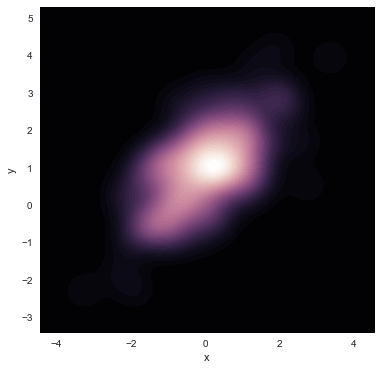

In [22]:
#可以使用前面的颜色面板使得颜色更加的连续
f, ax = plt.subplots(figsize=(6, 6))
#产生颜色面板，返回colormap对象
#cmap = sb.choose_cubehelix_palette(as_cmap=True)
cmap = sb.cubehelix_palette(as_cmap=True, dark=0., light=1, reverse=True)
print(cmap.colors)
#通过关键字参数指定cmap
sb.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

In [117]:
### JointGrid

<class 'seaborn.axisgrid.JointGrid'>


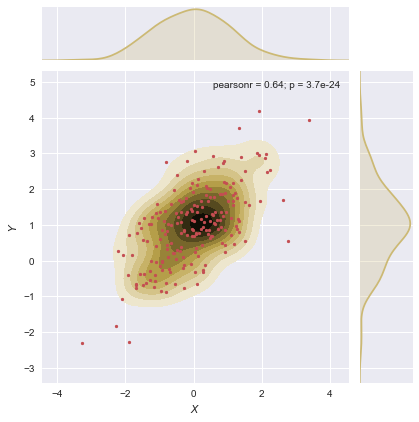

In [23]:
#jointplot返回一个JointGrid对象，可以通过这个对象对图表进行更多的设置
g = sb.jointplot(x="x", y="y", data=df, kind="kde", color="y")
print(type(g))
g.plot_joint(plt.scatter, c="r", s=20, linewidth=1, marker=".")
g.ax_joint.collections[0].set_alpha(0)
#设置轴坐标标签
g.set_axis_labels("$X$", "$Y$")

### 两两属性之间的关系可视化

In [24]:
## 使用iris数据集，这个数据集是Seaborn内置的数据集
data = sb.load_dataset('iris')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [25]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


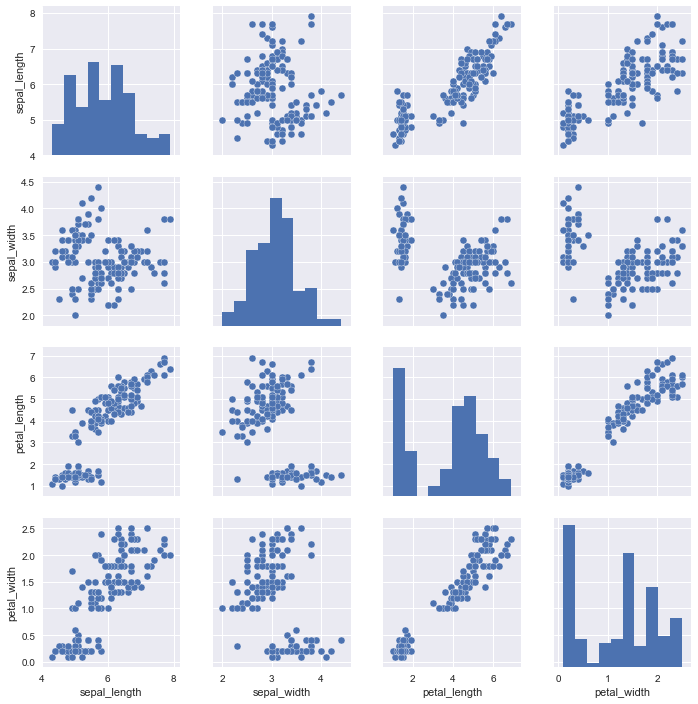

In [26]:
### 使用pairplot方法，Seaborn自动取出两个属性进行二元关系散点图的绘制
sb.pairplot(data)

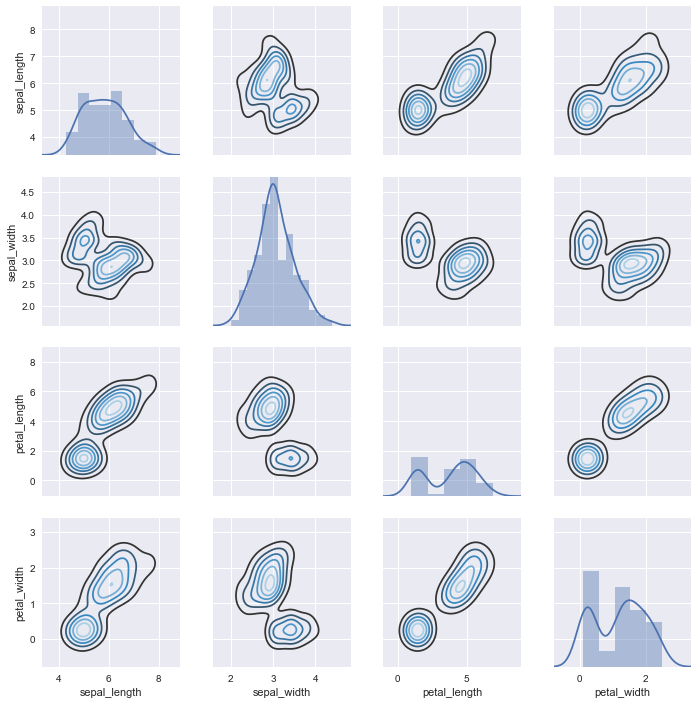

In [27]:
## 和jointplot方法类似， pairplot方法是建立在PairGrid对象之上的，可以直接通过该对象进行更加灵活的设置
g = sb.PairGrid(data)
#设置主对角线上的图形
g.map_diag(sb.distplot)
#g.map_diag(sb.kdeplot)
g.map_offdiag(sb.kdeplot, cmap="Blues_d", n_levels=6)